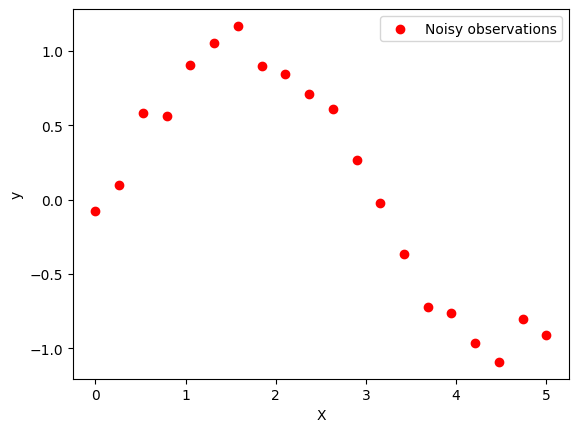

0.906**2 * RBF(length_scale=1.58) + WhiteKernel(noise_level=0.0103)


In [2]:
#understanding how LML works for GPR optimization
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel

# Generate sample data
X_train = np.linspace(0, 5, 20).reshape(-1, 1)  # 20 points between 0 and 5
y_train = np.sin(X_train).ravel() + np.random.normal(0, 0.1, X_train.shape[0])  # Sinusoidal data with noise

# Plot the training data
plt.scatter(X_train, y_train, label="Noisy observations", color="r")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Define kernel with hyperparameters
kernel = C(1.0) * RBF(length_scale=1.0) + WhiteKernel(noise_level=1.0)

# Create GP model
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Fit to data (optimizes hyperparameters)
gp.fit(X_train, y_train)

# Print optimized hyperparameters
print(gp.kernel_)
